# Basic Machine Learning Regression

Body mass index (BMI, weight (kg)/height (m)(2)) is the most widely used weight-height index worldwide (American journal of physical anthropology, 128(1), 220–229). BMI is a surrogate measure of body fatness because it is a measure of excess weight rather than excess body fat. Factors such as age, sex, ethnicity, and muscle mass can influence the relationship between BMI and body fat. Here, we want to predict whether weight (kg) alone, can predict BMI. Since BMI is a continuous variable, we will build a simple linear regression model to address this.

## Data loading with Pandas
- Load `weightLogInfo_merged` dataset using Pandas.
- Check the first five observations of each

In [41]:
import pandas as pd

weight = pd.read_csv("/Users/aneesavalentine/Downloads/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv", index_col = 0)
weight.head(5)

### Index col function creates an indexed column with a number corresponding to each observation.

,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
Id,,,,,,,
1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


## Simple analysis
- Check the shape of the dataset, 
- list the column names count number of unique values in `income` column, 
- plot the histogram of age grouped by income

In [29]:
weight.shape

### (Rows, columns) or (observations, features)
### There are 7 features and 67 observations in our dataset.

(67, 7)

In [30]:
list(weight.columns)

### We assume the  column is the target variable so we want to know the names of all the other columns.
### List function is optional.

['Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId']

In [31]:
weight.BMI

### Shows first and last values in the long "BMI" vector.
### We are just doing data exploration now.
### BMI is our target variable.

Id
1503960366    22.650000
1503960366    22.650000
1927972279    47.540001
2873212765    21.450001
2873212765    21.690001
                ...    
8877689391    25.440001
8877689391    25.559999
8877689391    25.610001
8877689391    25.559999
8877689391    25.139999
Name: BMI, Length: 67, dtype: float64

In [34]:
weight.BMI.value_counts()

### Value_counts counts the number of values in the "income" column. We have 67 datapoints total.
### Also tells us the data is unbalanced.
### Here we can see that almost all values are unique, ranging from 20-30, with one "outlier" valued at 47.
### We cannot determine true outliers just by looking at these values by eye.

23.889999    5
23.959999    5
24.000000    5
25.559999    4
25.590000    4
25.410000    4
24.100000    4
24.240000    2
25.490000    2
25.530001    2
25.680000    2
24.170000    2
23.820000    2
22.650000    2
24.389999    1
28.000000    1
25.610001    1
25.440001    1
25.260000    1
21.450001    1
21.690001    1
25.290001    1
27.450001    1
27.379999    1
25.309999    1
27.250000    1
27.459999    1
27.320000    1
24.350000    1
23.930000    1
23.850000    1
27.040001    1
47.540001    1
27.000000    1
24.209999    1
25.139999    1
Name: BMI, dtype: int64

BMI
21.450001    AxesSubplot(0.125,0.125;0.775x0.755)
21.690001    AxesSubplot(0.125,0.125;0.775x0.755)
22.650000    AxesSubplot(0.125,0.125;0.775x0.755)
23.820000    AxesSubplot(0.125,0.125;0.775x0.755)
23.850000    AxesSubplot(0.125,0.125;0.775x0.755)
23.889999    AxesSubplot(0.125,0.125;0.775x0.755)
23.930000    AxesSubplot(0.125,0.125;0.775x0.755)
23.959999    AxesSubplot(0.125,0.125;0.775x0.755)
24.000000    AxesSubplot(0.125,0.125;0.775x0.755)
24.100000    AxesSubplot(0.125,0.125;0.775x0.755)
24.170000    AxesSubplot(0.125,0.125;0.775x0.755)
24.209999    AxesSubplot(0.125,0.125;0.775x0.755)
24.240000    AxesSubplot(0.125,0.125;0.775x0.755)
24.350000    AxesSubplot(0.125,0.125;0.775x0.755)
24.389999    AxesSubplot(0.125,0.125;0.775x0.755)
25.139999    AxesSubplot(0.125,0.125;0.775x0.755)
25.260000    AxesSubplot(0.125,0.125;0.775x0.755)
25.290001    AxesSubplot(0.125,0.125;0.775x0.755)
25.309999    AxesSubplot(0.125,0.125;0.775x0.755)
25.410000    AxesSubplot(0.125,0.125;0.775x0.7

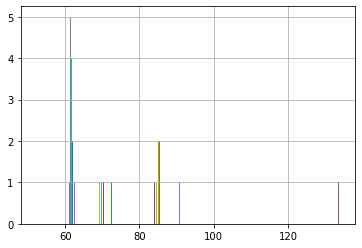

In [38]:
weight.groupby(["BMI"])

### Returns an object with BMI groups, based on the distribution we saw above.


weight.groupby(["BMI"]).WeightKg.hist()

### Returns a histogram demonstrating tradeoff between BMI and weight using our previously generated object.

# Splitting into training and test data
- Split data into train and test datasets

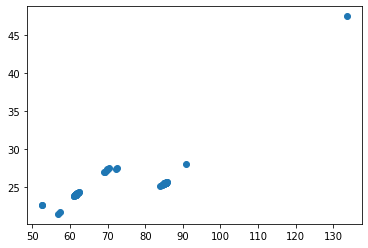

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x = weight['WeightKg']
y = weight['BMI']
plt.scatter(x, y);

### Fitting the data to a line we already see poor association between weight (kg) and BMI.

In [46]:
from sklearn.linear_model import LinearRegression # Chose model class

model = LinearRegression(fit_intercept=True) # Chose model hyperparameters
model 

LinearRegression()

In [47]:
X = x[:, np.newaxis]
X.shape

# Arrange data into features matrix and target vector

/var/folders/bd/djhgjhzs6rx_1ffvlb2ncd8c0000gn/T/ipykernel_8097/4193726946.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]


(67, 1)

In [48]:
model.fit(X, y)

# Fit the model to our data

LinearRegression()

In [49]:
model.coef_

array([0.16205422])

In [50]:
model.intercept_

# These two parameters represent the slope and intercept of the simple linear fit to the data. 

13.511514767576555

In [51]:
# Predict the values on new data 

xfit = np.linspace(-1, 11)

# Coerce these x values into a features matrix 

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

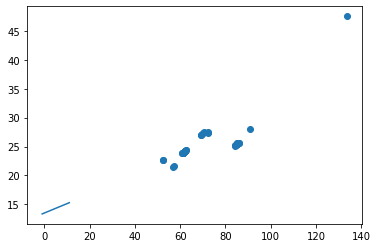

In [52]:
# Now visualize the results by first plotting the raw data, then the model fit 

plt.scatter(x, y)
plt.plot(xfit, yfit);